In [3]:
import pandas as pd
import json

In [8]:
import dask.dataframe as dd

In [16]:
import chardet

In [21]:
# Detecta la codificación del archivo
with open('review.json', 'rb') as f:
    raw_data = f.read(10000)  # Lee los primeros 10,000 bytes
    result = chardet.detect(raw_data)

print(f"Codificación detectada: {result['encoding']}")

# Abre el archivo con la codificación detectada
data = []
with open('review.json', 'r', encoding=result['encoding']) as f:
    for line in f:
        try:
            # Carga cada línea como un objeto JSON
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error en la línea: {line}")
            print(f"Detalles del error: {e}")

print(data[:2])

Codificación detectada: MacRoman
[{'review_id': 'KU_O5udG6zpxOg-VcAEodg', 'user_id': 'mh_-eMZ6K5RLWhZyISBhwA', 'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw', 'stars': 3.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", 'date': '2018-07-07 22:09:11'}, {'review_id': 'BiTunyQ73aT9WBnpR9DZGw', 'user_id': 'OyoGAe7OKpv6SyGZT5g77Q', 'business_id': '7ATYjTIgM3jUlt4UM3IypQ', 'stars': 5.0, 'useful': 1, 'funny': 0, 'cool': 1, 'text': "I've taken a lot of spin classes over the years, and nothing c

In [23]:
# Convertir la lista de diccionarios a un DataFrame
df = pd.DataFrame(data)

# Ver las primeras filas del DataFrame
print(df.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

In [24]:
# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas de las columnas numéricas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB
None
              stars        useful         funny          cool
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  1.182000e+03  7.

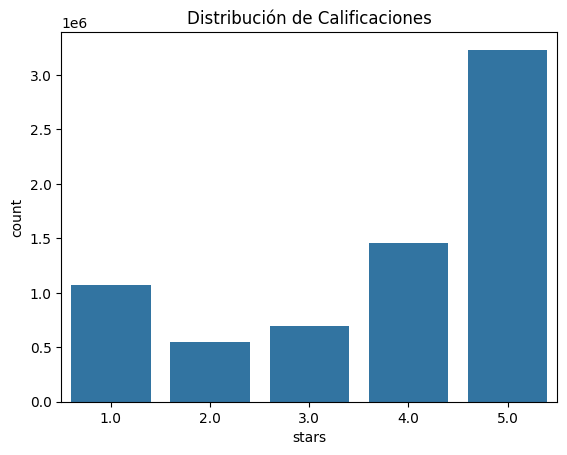

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de las calificaciones
sns.countplot(x='stars', data=df)
plt.title('Distribución de Calificaciones')
plt.show()

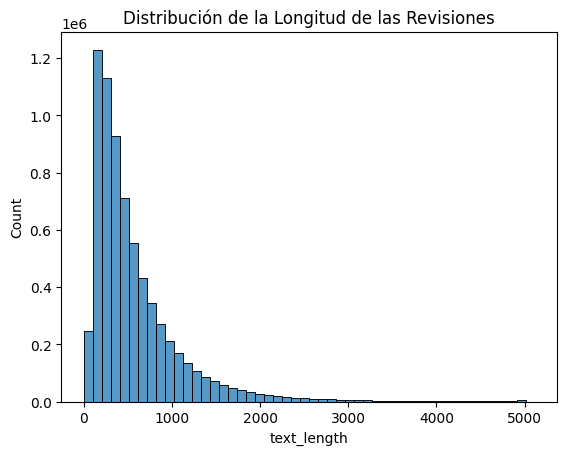

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.

KeyboardInterrupt



In [28]:
# Longitud de cada revisión
df['text_length'] = df['text'].apply(len)

# Distribución de la longitud de las revisiones
sns.histplot(df['text_length'], bins=50)
plt.title('Distribución de la Longitud de las Revisiones')
plt.show()

# Palabras más comunes
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenizar y contar palabras
all_words = ' '.join(df['text']).split()
filtered_words = [word for word in all_words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)

# Top 10 palabras más comunes
print(word_counts.most_common(10))

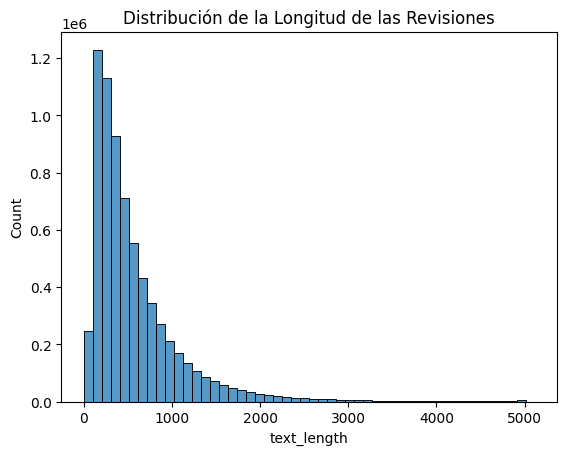

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

KeyboardInterrupt



In [29]:
# Longitud de cada revisión
df['text_length'] = df['text'].apply(len)

# Distribución de la longitud de las revisiones
sns.histplot(df['text_length'], bins=50)
plt.title('Distribución de la Longitud de las Revisiones')
plt.show()

# Palabras más comunes
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenizar y contar palabras
all_words = ' '.join(df['text']).split()
filtered_words = [word for word in all_words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)

# Top 10 palabras más comunes
print(word_counts.most_common(10))

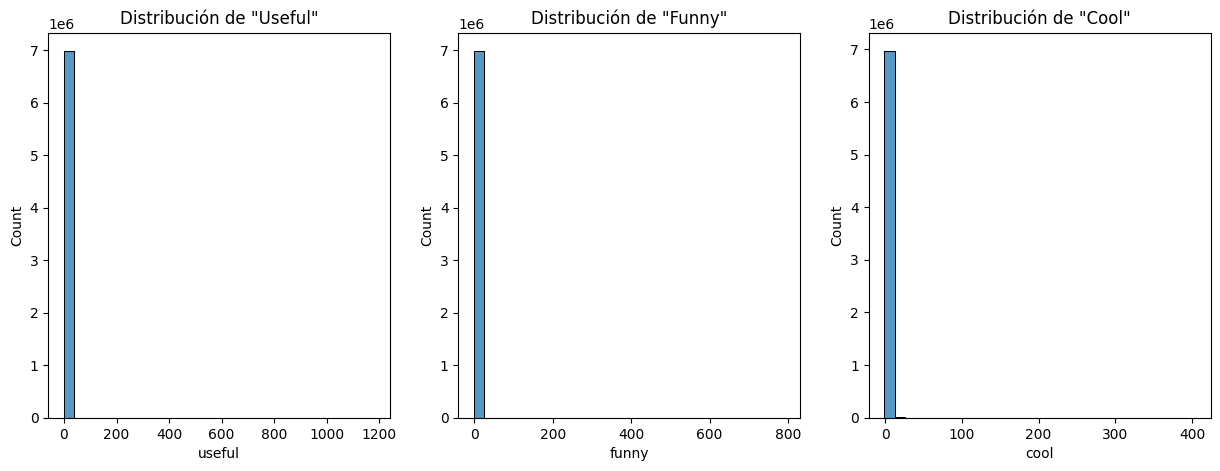

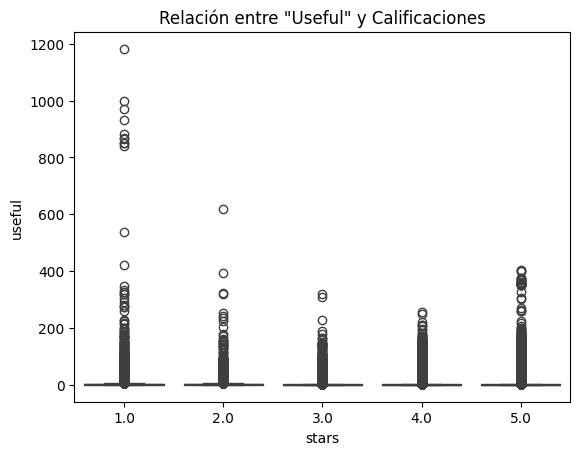

In [30]:
# Distribución de las reacciones
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['useful'], bins=30, ax=axes[0])
sns.histplot(df['funny'], bins=30, ax=axes[1])
sns.histplot(df['cool'], bins=30, ax=axes[2])
axes[0].set_title('Distribución de "Useful"')
axes[1].set_title('Distribución de "Funny"')
axes[2].set_title('Distribución de "Cool"')
plt.show()

# Relación entre reacciones y calificaciones
sns.boxplot(x='stars', y='useful', data=df)
plt.title('Relación entre "Useful" y Calificaciones')
plt.show()

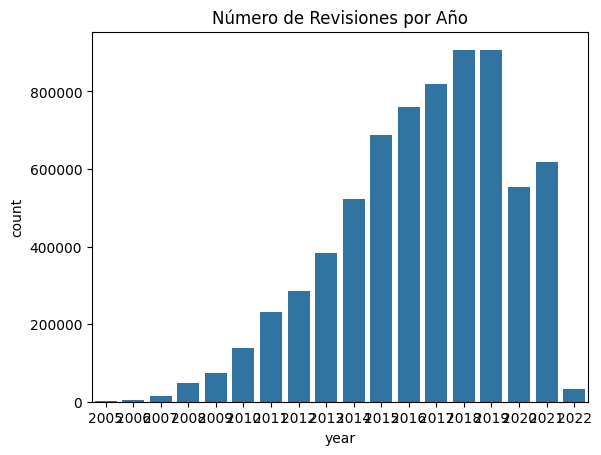

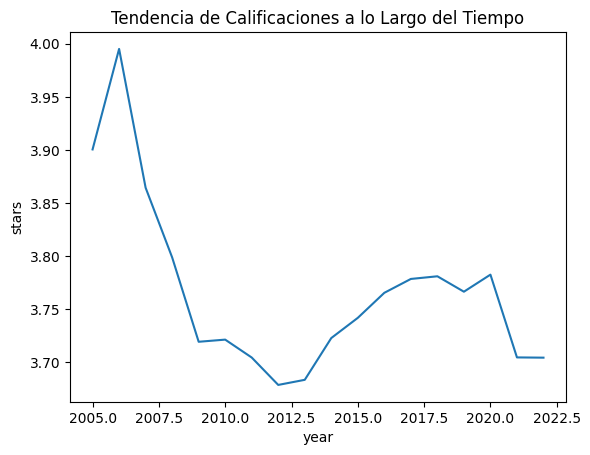

In [31]:
# Convertir la columna `date` a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Número de revisiones por año
sns.countplot(x='year', data=df)
plt.title('Número de Revisiones por Año')
plt.show()

# Tendencia de calificaciones a lo largo del tiempo
sns.lineplot(x='year', y='stars', data=df.groupby('year')['stars'].mean().reset_index())
plt.title('Tendencia de Calificaciones a lo Largo del Tiempo')
plt.show()

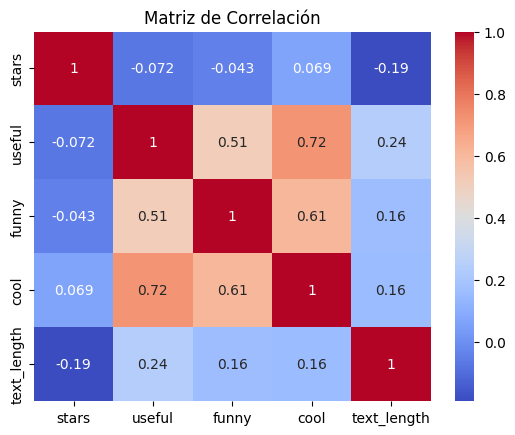

In [32]:
# Matriz de correlación
corr_matrix = df[['stars', 'useful', 'funny', 'cool', 'text_length']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

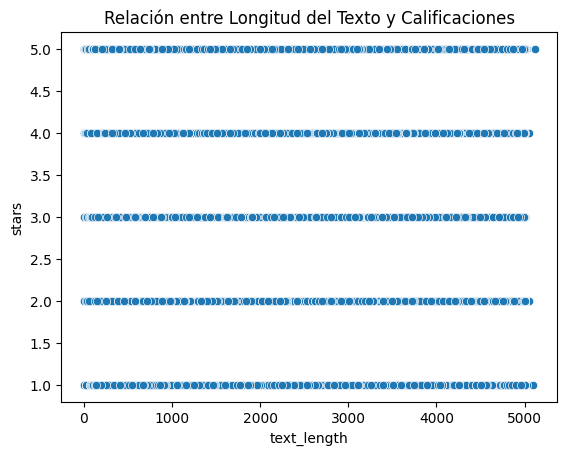

In [33]:
sns.scatterplot(x='text_length', y='stars', data=df)
plt.title('Relación entre Longitud del Texto y Calificaciones')
plt.show()